一、研究背景  
交通信号控制的底层逻辑是根据道路车辆的数量决定放行的道路，于此同时放行的道路车流方向不能发生冲突。如果能够准确预测道路车辆数，就能够制定合理的放行方案减轻路口的拥堵状况。根据以上逻辑，本研究拟采用STFGNN模型和D3QN模型融合得到新的强化学习信号控制模型。STFGNN模型拥有良好的车流量预测性能，使用STFGNN对道路车流量进行预测，将STFGNN对路口车流量的编码用于下游D3QN决策任务可大大提高D3QN的Q值学习能力。本研究将从STFGNN对动态信号控制路网的流量预测能力、STFGNN+D3QN对Q值的学习能力两个方面展开研究和实验。本研究具有两个创新点。一是动态信号控制交通流量预测，传统的流量预测研究是对静态交通信号控制的路口进行车流量预测，而本研究提供了对动态交通信号路网的预测方法；二是融合了图神经网络的强化学习交通信号控制，已有的研究常用MLP和自注意力机制构建深度强化学习中的神经网络，本研究创新性地使用了图神经网络并取得了良好的优化效果。

二、名词定义  

交通规则名词  
相位：相位规定了放行的车道，路口每次只能执行一个相位。例如 一个路口包含8个相位，相位1表示放行南北直行和南北左转车道，相位2表示放行东西直行和东西左转车道。  
强化学习名词  
动作：动作对应交通规则中的相位，强化学习决策决定执行的动作编号等价于相位编号  
动作周期：一个动作执行的时长，本研究中所有动作执行固定时长10s。  
神经网络名词  
图神经网络节点：节点为交叉路口每个方向每个转向的入口车道。例如一个拥有东南西北4个方向的路口，每个方向包含左直右3个转向，那么该路口包含4*3共12个节点。  
统计量名词  
车流量：每个节点在动作周期内的新进车辆数成为车流量。  
车辆数：每个节点在动作周期内的总车辆数。

三、实验设计

STFGNN+D3QN模型分为两个部分，一个是STFGNN流量预测模型、二是D3QN决策模块。本研究将对两个模块进行实验。  

3.1 cityflow仿真、UniLight、STFGNN独立实验

cityflow仿真环境实验    
a. 首先验证仿真路网的车流量、车辆数分布。对所有路口都不设定红绿灯使得车辆自由通行，统计节点的车流量、车辆数两个指标。  
b. 验证在循环动作下路网的车流量、车辆数。所有路口从0相位开始循环执行相位，统计节点的车流量、车辆数两个指标。  
UniLight实验  
a. 使用原UniLight对路网进行训练，并记录每一轮训练的车流量。   
b. 提取UniLight实验第1、25、50、75、100轮训练日志进行回放，查看路口拥堵情况，统计车道压力、平均穿越路网时间、穿越路网总车辆数3个统计量。   
STFGNN实验    
a. 使用STFGNN对cityflow仿真环境a、b实验中的车辆数车流量进行预测,统计MAE指标,保存归一化指标和adj_mx矩阵。  
b. 提取UniLight实验第1、25、50、75、100轮的车流量数据，使用STFGNN进行预测，统计MAE指标,保存相应的归一化指标和adj_mx矩阵。验证STFGNN对动态信号控制下的流量预测性能。


3.2 UniLight+STFGNN融合实验

根据模型原理，将STFGNN融合到UniLight中作为深度神经网络的一部分。在融合模型中设置两个辅助损失函数即流量预测损失和相位预测损失。实验步骤如下：
a. 运行融合模型并保存每一轮更新流量预测损失、相位预测损失。使用tensorboard记录数据。



四、实验结果

4.1 STFGNN的预测结果  
使用STFGNN对UniLight在训练过程中第1、25、50、75轮车流量数据进行预测，预测效果各有不同。  
1. 第1轮数据的预测MAE是为3.9，StemGNN_MAPE 317.91，超过10000%，预测性能非常差。    
2. 第25轮数据的预测MAE是为5.15，StemGNN_MAPE 301.10，预测性能非常差。  
3. 第50轮数据的预测MAE是为0.46，StemGNN_MAPE 168.70，预测性能非常差。  
4. 第75轮数据的预测MAE是为0.71，StemGNN_MAPE 338.39，预测性能非常差。   
4轮均值：281.525


删除归一化后的预测结果，归一化后预测性能并没有降低  
1. 第1轮数据的预测MAE是为3.9，StemGNN_MAPE 317.93，超过10000%，预测性能非常差。    
2. 第25轮数据的预测MAE是为5.15，StemGNN_MAPE 256.60，预测性能非常差。  
3. 第50轮数据的预测MAE是为0.46，StemGNN_MAPE 331.44，预测性能非常差。  
4. 第75轮数据的预测MAE是为0.71，StemGNN_MAPE 338.38，预测性能非常差。    
4轮均值：311.0875

4.2 结论
由4.1中的预测结果可知，STFGNN对强化学习控制下的仿真路网的预测效果非常差，StemGNN_MAPE百分比误差均达到10000%数量级，误差非常大。从结果来看，归一化的预测效果优于不归一化的效果。

五、实验改进方案  
5.1 原因分析  
根据四中的实验结果可知STFGNN对UniLight控制下的仿真环境车流量预测效果极差，分析可能原因如下：  
1. 节点特征设置不合理。上述方案中将每个车道的入口道作为STFGNN图神经网络的节点，以每个节点的车流量作为节点特征，而在STFGNN控制下的路网车流量实际上还与节点上游路口执行的相位有关系，故节点特征欠缺应有的信息量。
2. 车流量的定义不合理。上述方案中将车流量作为节点特征，车流量的定义为入口道新进的车辆数，而道路上现有的车辆也是影响相位决策的因素，所以车流量的定义不合理。
3. 节点定义不合理。以上方案中使用路口的进口道作为节点，而UniLight使用的是roadlink为单位进行计算。考虑以roadlink为单位计算是否优于以进口道为单位进行计算。

以上分析了STFGNN流量预测效果差的原因。而STFGNN与UniLight的融合方式也存在问题，分析如下：  
1. STFGNN的融合阶段错误。以上方案中将STFGNN直接对每个节点进行流量预测。这种方法无法识别属于同一路口的节点，可能对流量预测造成一定影响。  

5.2 改进实验设计  
根据5.1中的分析对进行一下验证实验：  
1. 在节点特征中加入相位信息。将每个路口的相位信息转换为每个节点的通行情况并拼接到车流量特征之后，进行实验并记录结果。   
2. 将STFGNN的流量预测误差与UniLight流量预测误差做对比。注意STFGNN中的流量的定义与UniLight中的流量略有差异，但也有一定对比价值。将STFGNN的误差衡量指标改为MSEloss，与UniLight保持一致。  
3. 将原设计方案改为以roadlink为单位节点，并将同一路口的节点进行self attention后再使用图神经网络编码预测出每个节点的流量和相位，不再使用STFGNN，而是使用普通的GCN或者GAT代替。  

六、改进实验结果  
1. 在节点特征中加入相位信息结果。  
在1、25、50、75轮的数据上进行实验，每轮实验的最终验证绝对百分比误差都远远超过100%，且结果与不加入相位时相似，说明加入相位对预测性能没有明显提升作用。StemGNN_MAPE的统计结果如下。  
第1轮：317.94  
第25轮：301.10  
第50轮：331.43  
第75轮：109.51  
4轮均值264.99。该效果优于不加入相位时的效果。

2. 原UniLight模型的流量预测误差和相位预测误差。  
UniLight mse在1以下0.5左右,性能远远高于STFGNN。  
STFGNN模型采用MSEloss后，效果如下：  

2.1 STFGNN以流量为节点特征，采用归一化  
第1轮数据，mse 68.91，欠拟合；   
第25轮数据，mse 102.1，过拟合；  
第50轮数据，mse 0.52，过拟合；  
第75轮数据，mse 0.40，过拟合；  
4次mse均值42.9825  

2.2 STFGNN以流量为节点特征，不采用归一化  
第1轮数据，mse 8.32，欠拟合；  
第25轮数据，mse 1834.45，过拟合；  
第50轮数据，mse 0.43，过拟合；  
第75轮数据，mse 0.80，过拟合；  
4次mse均值，第25轮数据偏差过大，均值没有参考性。只有流量作为输入且不做归一化导致模型性能不稳定。  

2.3 STFGNN以流量、相位为节点特征，不采用归一化  
第1轮数据，mse 3.54，欠拟合；  
第25轮数据，mse 99.64，过拟合；  
第50轮数据，mse 0.49，过拟合；  
第75轮数据，mse 0.37，过拟合；  
4次mse均值26.01  

2.4 STFGNN以流量、相位为节点特征，采用归一化  
第1轮数据，mse 59.60，欠拟合；  
第25轮数据，mse 12.01，过拟合；  
第50轮数据，mse 0.37，过拟合；  
第75轮数据，mse 0.97，过拟合；  
4次mse均值18.2375  

从以上结论可以看出，以流量、相位为节点特征，采用归一化的模型效果最好。但仍然需要进行过拟合调整。  
新进车辆的流量预测与UniLight的结果相近，UniLight的流量预测mse在0.3到1之间。可以尝试将该模型移植到原UniLight中。  

2.5 进行过拟合调整尝试，数据改为：  
    "hidden_dims": [[32,32,32], [32,32,32], [32,32,32]],  
    "first_layer_embedding_size": 32,  
    "out_layer_dim": 64,  
    即各个参数量除以2  
过拟合调整后结果如下：  
第1轮数据，mse 0.10，过拟合；  
第25轮数据，mse 1.57，过拟合；  
第50轮数据，mse 0.39，过拟合；  
第75轮数据，mse 0.37，过拟合；  
4次mse均值0.6075,调整过拟合后模型表现趋于稳定，整体误差也降低。  

2.6 使用2.5中的参数计算仍然过拟合，再次进行参数量减半，调整为以下参数：
"hidden_dims": [[16,16,16], [16,16,16], [16,16,16]],  
"first_layer_embedding_size": 16,  
"out_layer_dim": 32, 
过拟合调整后结果如下：  
第1轮数据，mse 0.10，过拟合；  
第25轮数据，mse 0.96，过拟合；  
第50轮数据，mse 0.36，过拟合；  
第75轮数据，mse 0.36，过拟合；  
4次mse均值0.4450，预测效果有所提升但提升不明显。将本轮参数量定为最终参数量。  


3. 以roadlink为单位节点并修改图神经网络的使用位置。
根据1和2中的实验结果，有必要进行该实验。对神经网络进行改造后实验结果如下：

使用训练好的模型生成的数据训练流量预测模型

* 数据处理

In [5]:
import json
import glob
import os
import numpy as np

# 数据顺序   ['TSflow','TSwait','TSgreen','TSphase','TStime','Envtime']
data_path=os.path.join('./trained_data','*.json')
data_all_epoch=[]
for file in glob.glob(data_path):
    data=[]
    with open(file, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    data_all_epoch.append(data) 

# 提取出TSflow、TSgreen
all_data=[]
for i in range(len(data_all_epoch)):
    raw_data=np.array([[np.c_[np.array(item[0]),np.array(item[2])] for item in data] for data in data_all_epoch[i]])
    raw_data=raw_data.reshape(raw_data.shape[0],-1,raw_data.shape[-1]) # [batch_size,N,2]
    road_data=raw_data.reshape(raw_data.shape[0],-1,3,2)
    all_data.append(np.sum(road_data,axis=2))
data=np.concatenate(all_data,axis=0)
save_path=f'./raw_data/CITYFLOW/trained_data_sample.npz'
np.savez(save_path,data)

In [85]:
%matplotlib agg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

for e,file in enumerate(glob.glob('./trained_data/*.npz')):
    plt.figure(figsize=[30,30])  
    for i in range(6):
        plt.subplot(6,1,i+1)
        for j in range(4):
            flow=pd.DataFrame(road_data[:,i*4+j,0]).rolling(10).mean()
            plt.plot(flow,label=f'direct flow {j}')
            plt.legend()
            plt.title(f'epoch{e} inter {i+1}')
            
    plt.savefig(f'./trained_data/epoch{e} road flow.png')

In [159]:
from collections import defaultdict

# 原{下游路口:上游路口}   反过来{上游路口:下游路口}
adj=json.load(open('./cityflow_adj/stfgnn_adj.json','r'))
reverse=defaultdict(list)
for key,value in adj.items():
    reverse[str(value)].append(key)

# 将节点3个一组聚合   新旧节点映射表
n=0
nodes_map={}
for i in range(24):
    nodes_map[f'{list(range(i*3,i*3+3))}']=i

up_down=defaultdict(list)
for key,value in reverse.items():
    if key!='[]':
        key=nodes_map[str(sorted(eval(key)))]
        for old_node in value:
            up_down[key].append(int(old_node)//3)
up_down={k:up_down[k] for k in sorted(up_down)}
with open('./cityflow_adj/adj24nodes.json','w') as f:
    json.dump(up_down,f)

# 生成新的adj
import pickle

adj24=np.zeros([24,24])
for k,v in up_down.items():
    adj24[k,v]=1
with open('./raw_data/CITYFLOW/adj_24.pkl','wb') as f:
    pickle.dump(adj24,f)

sum(sum(adj24==1)), 24*24, sum(sum(adj24==1))/(24*24)

(42, 576, 0.07291666666666667)

In [164]:
road_data.shape

(1200, 24, 2)

In [174]:
np.load('raw_data/CITYFLOW/trained_data_sample.npz')['arr_0'].shape

(12000, 24, 2)

In [6]:
1e-3

0.001

本阶段主要完成了Qmix绿波车速引导的模型搭建。在使用强化学习信号控制的路网中，自适应的信号决策解决了路网中的拥堵问题，使得车辆与车辆之间的相互影响减弱，在此种条件下以绿波车速通行能够有效减少红灯停车次数，提高驾驶体验。
所以本方案使用Qmix强化学习框架训练绿波车速引导模型，模型设计如下：
 
绿波车速模型的决策时刻与信号控制周期决策同步，绿波车速的拟合考虑了未来2个控制周期的信号，为了获取未来第2个周期的信号，本项目使用流量预测模型预测除了未来第2个周期开始时的道路车辆以提供给信号控制模型进行信号输出。绿波车速引导模型的输入包含车道长度、当前车道车辆数和车辆密度、未来2个信号周期的信号。
当前实验进展：
1.	已验证流量预测模型对未来第2个周期开始前的车辆数预测能力。所用车流数据分布为平均每条道路每间隔20s进行一次截图，路面车辆数为20辆。流量预测绝对平均误差（MAE）为1.6，均方根误差（MSE）为5。
2.	已搭建模型训练框架。未获得有效成果。


In [37]:
import glob
import json

result=[]
for file in glob.glob('./log整理/*.log'):
    with open(file,'r') as f:
        for line in f:
            if "evaluate result" in line:
                try:
                    t=float(line.split(':')[2].rstrip(' lr:').lstrip(' '))
                except:
                    t=float(line.split(':')[1].rstrip('\n'))
                if t<6000:
                    result.append(float(t))
        result.append(file)
                

In [38]:
result

[5194.2966880294,
 5197.167839376149,
 5469.337904454603,
 4193.813606417783,
 4741.00515394613,
 3820.3131358400933,
 3582.3661542598484,
 4418.666069107695,
 './log整理\\0-1.log',
 3164.6125128848653,
 2998.731636265854,
 3690.638103347824,
 './log整理\\0-2.log',
 3021.369336261372,
 1901.719939048985,
 2334.9040469681354,
 2723.2130596513243,
 2284.3030072155248,
 1280.584054138843,
 3431.3012593555327,
 1581.966030294882,
 3087.1183614932997,
 2200.4655133778515,
 2908.954690090978,
 1783.4001703043068,
 4428.746784385784,
 4626.020526150674,
 './log整理\\0.log',
 4600.3867700444,
 4643.536906736,
 2572.140008067,
 2966.3826020705,
 3567.9879442477,
 2109.0635952136,
 2368.3191413078,
 './log整理\\1.log',
 2130.6575987093,
 3738.3627929906,
 3438.7909738717,
 528.9027472774,
 1819.9945773954,
 2139.2327790974,
 177.239994622,
 './log整理\\2.log',
 170.3782996459,
 1945.3739972214,
 151.4825453731,
 207.1499058887,
 151.0241552389,
 153.2673657793,
 159.9208191432,
 244.172761495,
 991.039080

In [39]:
# 整理后的结果
refined_result=[5194.2966880294,
 5197.167839376149,
 5469.337904454603,
 4193.813606417783,
 4741.00515394613,
 3820.3131358400933,
 3582.3661542598484,
 4418.666069107695,
 4600.3867700444,
 4643.536906736,
 4428.746784385784,
 4626.020526150674,
 3738.3627929906,
 3438.7909738717,
 3164.6125128848653,
 2998.731636265854,
 3690.638103347824,
 3567.9879442477,
 2572.140008067,
 2966.3826020705,
 2109.0635952136,
 2368.3191413078,
 3021.369336261372,
 1901.719939048985,
 2334.9040469681354,
 2723.2130596513243,
 2284.3030072155248,
 1280.584054138843,
 3431.3012593555327,
 1581.966030294882,
 3087.1183614932997,
 2200.4655133778515,
 2908.954690090978,
 1783.4001703043068,
 2130.6575987093,
 528.9027472774,
 1819.9945773954,
 2139.2327790974,
 177.239994622,
 170.3782996459,
 1945.3739972214,
 151.4825453731,
 207.1499058887,
 151.0241552389,
 153.2673657793,
 159.9208191432,
 244.172761495,
 991.0390803567,
 189.1913682607,
 1518.3843499305,
 212.8482050822,
 187.0596961413,
 152.2286559405,
 149.6223168272,
 154.6322936273,
 151.8632635683,
 150.7100475038,
 152.5735669789,
 294.2782682741,
 157.82482635,
 187.5245372653,
 153.0581223392,
 152.9054362927,
 160.6214036031,
 183.7671760857,
 150.5572235168,
 152.7993546363]

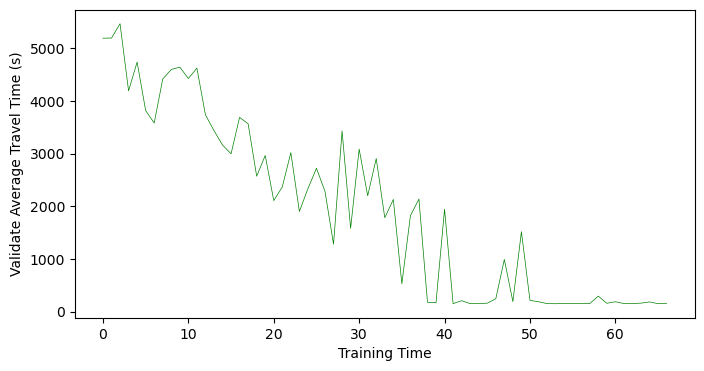

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=[8,4])
plt.plot(refined_result,color='green',linewidth=0.5)
plt.xlabel('Training Time')
plt.ylabel('Validate Average Travel Time (s)')
plt.savefig('./log整理/refined_result.png')
with open('./log整理/refined_result.json','w') as f:
    json.dump(refined_result,f)